In [24]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_dir = "../shap/results/gsea_results"

libraries = [
    "MSigDB_Hallmark_2020",
    "Reactome_2016",
    "GO_Biological_Process_2021"
]

modes = ["split", "full"]  # split = divided SHAP scores; full = full SHAP scores per gene

In [25]:
def load_biomining_results(lib: str, mode: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"biomining_GSEA_{lib}_{mode}.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        df["Mode"] = mode
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_bio_results = pd.concat([load_biomining_results(lib, mode) for lib in libraries for mode in modes], ignore_index=True)

In [26]:
def load_transynergy_results(lib: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"transynergy_GSEA_{lib}_split.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        df["Mode"] = "split"
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_tran_results = pd.concat([load_transynergy_results(lib) for lib in libraries], ignore_index=True)

In [27]:
def summarize_top_pathways(df, paper, top_n=5):
    for lib in libraries:
        for mode in modes:
            subset = df[(df.Library == lib) & (df.Mode == mode)]
            if subset.empty:
                continue
            if paper == "Biomining":
                print(f"\nTop {top_n} enriched pathways for {paper} {lib} ({mode} scores):")
            else:
                print(f"\nTop {top_n} enriched pathways for {paper} {lib}:")
            display(subset.sort_values("NES", ascending=False).head(top_n)[
                ["Term", "NES", "NOM p-val", "FDR q-val", "Lead_genes"]
            ])

summarize_top_pathways(all_bio_results, "Biomining")
summarize_top_pathways(all_tran_results, "Transynergy")


Top 5 enriched pathways for Biomining MSigDB_Hallmark_2020 (split scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Pperoxisome,1.491215,0.029197,0.254486,TOP2A;NR1I2
1,G2-M Checkpoint,1.459822,0.031397,0.157219,TOP2A;ABL1
2,Mitotic Spindle,1.436666,0.065808,0.132137,TOP2A;ABL1
3,Estrogen Response Late,1.360246,0.061224,0.177406,TOP2A;RET
5,Bile Acid Metabolism,1.200139,0.229299,0.729201,NR1I2



Top 5 enriched pathways for Biomining MSigDB_Hallmark_2020 (full scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
26,Mitotic Spindle,1.595135,0.021708,0.104394,TOP2A;ABL1
27,G2-M Checkpoint,1.543506,0.022472,0.077102,TOP2A;ABL1
28,Pperoxisome,1.314496,0.139296,0.235171,TOP2A;NR1I2;HRAS
30,E2F Targets,1.256094,0.163752,0.325635,TOP2A
32,Bile Acid Metabolism,1.200139,0.229299,0.402566,NR1I2



Top 5 enriched pathways for Biomining Reactome_2016 (split scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
95,G0 and Early G1 Homo sapiens R-HSA-1538133,1.292848,0.091858,1.0,TOP2A
96,SUMOylation of DNA replication proteins Homo s...,1.292848,0.091858,1.0,TOP2A
97,Mitotic G1-G1/S phases Homo sapiens R-HSA-453279,1.292848,0.091858,1.0,TOP2A
99,VEGF ligand-receptor interactions Homo sapiens...,1.218487,0.205442,1.0,FLT1;KDR;FLT4
100,VEGF binds to VEGFR leading to receptor dimeri...,1.218487,0.205442,1.0,FLT1;KDR;FLT4



Top 5 enriched pathways for Biomining Reactome_2016 (full scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
296,G beta:gamma signalling through PI3Kgamma Homo...,1.727996,0.01108,0.22842,PIK3CD;PIK3CA;PIK3CB;PIK3CG
298,G-protein beta:gamma signalling Homo sapiens R...,1.727996,0.01108,0.22842,PIK3CD;PIK3CA;PIK3CB;PIK3CG
299,GPCR downstream signaling Homo sapiens R-HSA-3...,1.727996,0.01108,0.22842,PIK3CD;PIK3CA;PIK3CB;PIK3CG
300,GPVI-mediated activation cascade Homo sapiens ...,1.727996,0.01108,0.22842,PIK3CD;PIK3CA;PIK3CB;PIK3CG
297,"Platelet activation, signaling and aggregation...",1.727996,0.01108,0.22842,PIK3CD;PIK3CA;PIK3CB;PIK3CG



Top 5 enriched pathways for Biomining GO_Biological_Process_2021 (split scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
544,protein phosphorylation (GO:0006468),1.778725,0.001149,0.246886,FLT1;ABL1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
545,protein autophosphorylation (GO:0046777),1.726214,0.009434,0.11614,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
546,peptidyl-tyrosine phosphorylation (GO:0018108),1.726214,0.009434,0.11614,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
547,peptidyl-tyrosine modification (GO:0018212),1.726214,0.009434,0.11614,FLT1;ABL1;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R
550,positive regulation of transferase activity (G...,1.711805,0.008264,0.079962,FLT1;RET;EGFR;KIT;KDR;FLT4;PDGFRB;CSF1R



Top 5 enriched pathways for Biomining GO_Biological_Process_2021 (full scores):


,Term,NES,NOM p-val,FDR q-val,Lead_genes
1436,phosphorylation (GO:0016310),2.021507,0.0,0.063038,ABL1;PIK3CG;PIK3CA;PIK3CB;PIK3CD;RET
1437,phosphatidylinositol-3-phosphate biosynthetic ...,1.727267,0.009695,0.293071,PIK3CG;PIK3CA;PIK3CB;PIK3CD
1438,phosphatidylinositol phosphate biosynthetic pr...,1.727267,0.009695,0.293071,PIK3CG;PIK3CA;PIK3CB;PIK3CD
1446,axon guidance (GO:0007411),1.646403,0.01931,0.481245,PIK3CA;PIK3CB;PIK3CD;RET
1447,Fc receptor mediated stimulatory signaling pat...,1.605803,0.021116,0.416999,ABL1;PIK3CA;PIK3CB



Top 5 enriched pathways for Transynergy MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Pancreas Beta Cells,1.547845,0.076471,0.60392,CHGA
1,Androgen Response,1.498573,0.026585,0.611558,AKT1;KLK2;CDK6;RPS6KA3;CAMKK2;LIFR
2,Bile Acid Metabolism,1.478532,0.064693,0.512941,AR;IDH2
3,Reactive Oxygen Species Pathway,1.471505,0.129555,0.416277,ERCC2
4,DNA Repair,1.429622,0.085864,0.523872,ERCC3;ERCC2;GSDME



Top 5 enriched pathways for Transynergy Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
52,Regulation of TP53 Activity through Associatio...,1.690505,0.001218,1.0,AKT2;AKT1
54,Activation of BAD and translocation to mitocho...,1.674029,0.0,1.0,AKT2;AKT1
55,YAP1- and WWTR1 (TAZ)-stimulated gene expressi...,1.669108,0.004619,0.987,CHD9
56,Smooth Muscle Contraction Homo sapiens R-HSA-4...,1.649836,0.030418,1.0,TPM3;TPM4;ANXA1
57,RNA Polymerase I Promoter Escape Homo sapiens ...,1.648312,0.01145,0.856415,ERCC3;ERCC2



Top 5 enriched pathways for Transynergy GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
1432,histone H2A ubiquitination (GO:0033522),1.714439,0.002506,0.942179,BCOR;UBE2A
1433,presynapse assembly (GO:0099054),1.712753,0.0,0.537305,WNT7A;PTEN
1434,cell migration involved in sprouting angiogene...,1.711545,0.0,0.388531,EGR3;AKT1
1435,blood vessel endothelial cell migration (GO:00...,1.710956,0.00123,0.301507,EGR3;AKT1
1437,presynapse organization (GO:0099172),1.708261,0.0,0.291752,WNT7A


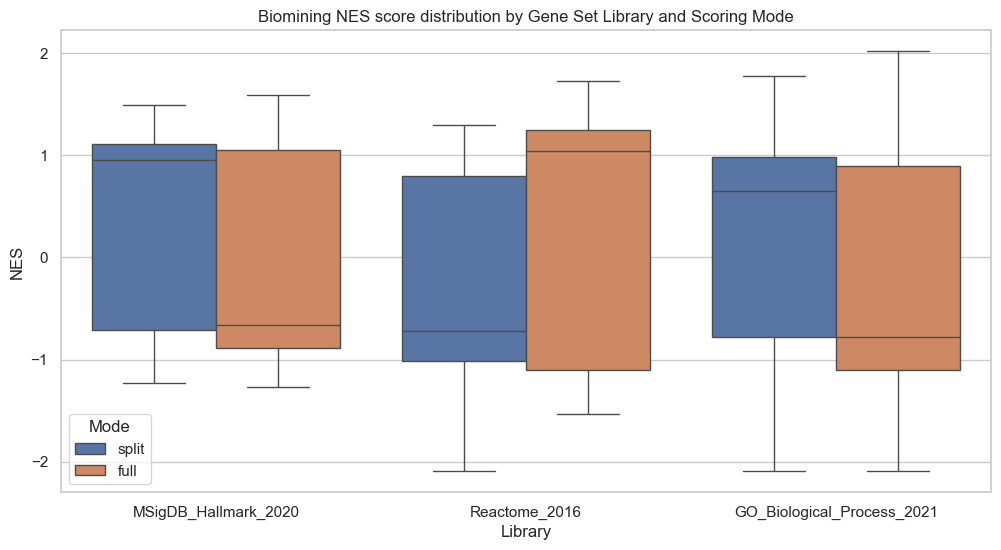

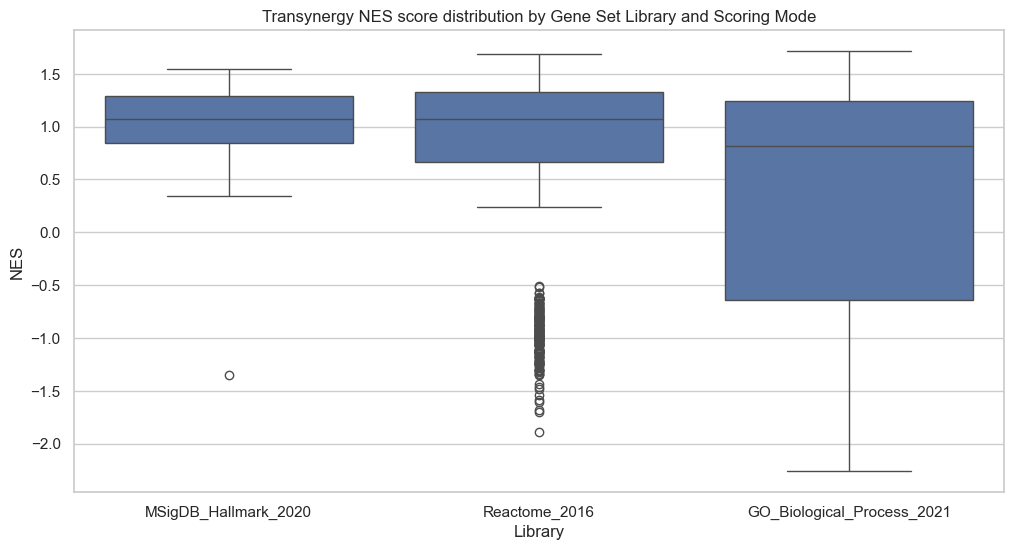

In [28]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_bio_results, x="Library", y="NES", hue="Mode")
plt.title("Biomining NES score distribution by Gene Set Library and Scoring Mode")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=all_tran_results, x="Library", y="NES")
plt.title("Transynergy NES score distribution by Gene Set Library and Scoring Mode")
plt.show()

In [29]:
def compare_significant_pathways(df, paper, fdr_threshold=0.25):
    for lib in libraries:
        df_lib = df[df.Library == lib]
        sig_split = set(df_lib[(df_lib.Mode == "split") & (df_lib["FDR q-val"] < fdr_threshold)]["Term"])
        sig_full = set(df_lib[(df_lib.Mode == "full") & (df_lib["FDR q-val"] < fdr_threshold)]["Term"])
        common = sig_split.intersection(sig_full)
        only_split = sig_split - sig_full
        only_full = sig_full - sig_split

        print(f"\nPaper: {paper}")
        print(f"Library: {lib}")
        print(f"Significant pathways in both split and full: {len(common)}")
        print(f"Significant pathways only in split: {len(only_split)}")
        print(f"Significant pathways only in full: {len(only_full)}")

        if common:
            print("Examples of common significant pathways:")
            for p in list(common)[:5]:
                print(f" - {p}")

compare_significant_pathways(all_bio_results, "Biomining")


Paper: Biomining
Library: MSigDB_Hallmark_2020
Significant pathways in both split and full: 2
Significant pathways only in split: 1
Significant pathways only in full: 1
Examples of common significant pathways:
 - G2-M Checkpoint
 - Mitotic Spindle

Paper: Biomining
Library: Reactome_2016
Significant pathways in both split and full: 5
Significant pathways only in split: 34
Significant pathways only in full: 26
Examples of common significant pathways:
 - G beta:gamma signalling through PI3Kgamma Homo sapiens R-HSA-392451
 - GPCR downstream signaling Homo sapiens R-HSA-388396
 - G-protein beta:gamma signalling Homo sapiens R-HSA-397795
 - GPVI-mediated activation cascade Homo sapiens R-HSA-114604
 - Platelet activation, signaling and aggregation Homo sapiens R-HSA-76002

Paper: Biomining
Library: GO_Biological_Process_2021
Significant pathways in both split and full: 0
Significant pathways only in split: 14
Significant pathways only in full: 2
